# ДЗ 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

**Предсказание баллов ЕГЭ ученика**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [31]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
    return W

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

## График зависимости весов

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

Стандартизируем данные:

In [17]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

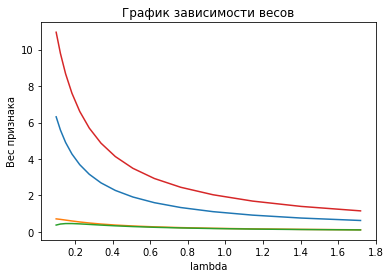

In [18]:
n = 35
coeff_ = []
lambda_ = np.logspace(-1, 2, n)

for i, val in enumerate(lambda_):
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeff_.append(W)

plt.plot(lambda_, coeff_)
plt.title('График зависимости весов')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

Вывод: При увеличении lambda веса признаков стремятся к нулю.

## Функция для применения L1-регуляризации

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [28]:
def gradient_descent_reg_l1(X, y, iterations, eta, reg, x_shape_index):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        # ИЗМЕНЕНИЯ---1
        dReg = reg * W/np.abs(W) # градиент регуляризации
        # ИЗМЕНЕНИЯ---1
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [29]:
W = gradient_descent_reg_l1(X_st, y, iterations=10000, eta=1e-2, reg=1e-4, x_shape_index=0)

Iter: 0, weights: [ 1.5102302  -0.10365829  0.95645443  0.9550455 ], error 3559.145852093392
Iter: 1000, weights: [28.39595479  6.07412398 -5.79408997 16.29783645], error 32.839859275336146
Iter: 2000, weights: [34.33598205  6.22079825 -3.50150609 12.90511552], error 27.485470177601655
Iter: 3000, weights: [37.7079688   6.24677038 -2.14210453 10.97729415], error 25.745104049162514
Iter: 4000, weights: [39.6311763   6.26095038 -1.36613129  9.87774351], error 25.178604228137214
Iter: 5000, weights: [40.72817452  6.26903169 -0.92350885  9.25055922], error 24.9941376081497
Iter: 6000, weights: [41.35390377  6.27364121 -0.67103633  8.89281246], error 24.934033490093718
Iter: 7000, weights: [41.71082059  6.27627048 -0.52702566  8.68875322], error 24.914428822575605
Iter: 8000, weights: [41.91440642  6.27777022 -0.44488178  8.57235756], error 24.90802215536206
Iter: 9000, weights: [42.03053206  6.27862567 -0.3980268   8.50596531], error 24.905921647137056
Final MSE: 24.905229075850535


## * Нормализация и стандартизация

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация данных:

In [32]:
X_norm = X.copy().astype(np.float64)
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

Стандартизация данных:

In [33]:
X_st = X.copy().astype(np.float64)
X_st[:, 2] = standart_scale(X_st[:, 2]) 
X_st[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

Стандартизация нормализованных данных:

In [34]:
X_st_norm = X_norm.copy()
X_st_norm[:,2] = standart_scale(X_st_norm[:,2])
X_st_norm[:,2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

Вывод: Можно, но как видим смысла не имеет.